In [1]:
import pandas as pd 
from bs4 import BeautifulSoup 
import requests 

In [2]:
url = 'https://www.eazydiner.com/hyderabad/restaurants/north-indian?page=2'

In [3]:
Request = requests.get(url)

In [4]:
Request

<Response [200]>

In [5]:
from bs4 import BeautifulSoup 

In [6]:
soup = BeautifulSoup(Request.text,features = 'html.parser')

In [7]:
soup

<!DOCTYPE html>
<html lang="en"><head><title>Best Dentists Near Me in  Bangalore - Practo</title><meta content="noindex" name="robots"/><meta content="Find the Top Dentists Near You in Bangalore with Practo. Book appointments online. View fees, check doctor's timings and availability, phone number, and experience. Read verified patient reviews to choose the right Dentist for your needs. Appointment Booking is 100% Free.| Practo" name="description"/><meta charset="utf-8"/><meta content="ie=edge" http-equiv="x-ua-compatible"/><script nonce="fgdGBODNzYuXBdAU3R4lNdLfJJYPzcaD" type="text/javascript">(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
                      new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
                      j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
                      'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
                      })(window,document,'scri

## Collecting Data FRom Easydiner Website 

_________________

### Restaurants in Hyderabad

In [10]:
import requests
from bs4 import BeautifulSoup

Restaurants_Names_HYD = []

# Loop through 1 to 45 pages
for page in range(1, 46):  
    url = f"https://www.eazydiner.com/hyderabad/restaurants/north-indian?page={page}"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

    # Extract restaurant names
    for i in soup.find_all('a', class_='ellipsis listing_res_name__uVIN8'):
        Restaurants_Names_HYD.append(i.text.strip())


In [12]:
# Convert list to DataFrame
Restaurant_name = pd.DataFrame(Restaurants_Names_HYD, columns=["Restaurant_Name"])

print("Total restaurants collected:", len(Restaurant_name))
Restaurant_name.head(15)   # show first 5 rows

Total restaurants collected: 341


,Restaurant_Name
0,Golconda Pavilion
1,Ice N Spice
2,10 Biryanis
3,Punjab Grill
4,Punjabi Swag
5,President Dhaba
6,Punjabi's Swag
7,The Sanctuary Bar and Kitchen
8,Hoy Punjab
9,Ohri's Gufaa


In [13]:
Restaurants_Style_HYD = []

# Loop through 1 to 45 pages
for page in range(1, 46):  
    url = f"https://www.eazydiner.com/hyderabad/restaurants/north-indian?page={page}"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

     # Extract restaurant Style
    for i in soup.find_all('div', class_='flex align-v-center ellipsis listing_multi_cuisines__zLLXK'):
        Restaurants_Style_HYD.append(i.text.strip())

In [15]:
style = pd.DataFrame(Restaurants_Style_HYD, columns=["Restaurant_Style"])

print("Total styles collected:", len(style))
style.head(15)   # show first 5 rows

Total styles collected: 341


,Restaurant_Style
0,"Multicuisine, Continental, Chinese, Desserts, ..."
1,"North Indian, South Indian"
2,"Mughlai, North Indian"
3,North Indian
4,"North Indian, Chinese"
5,"Chinese, North Indian"
6,"North Indian, Chinese"
7,"Continental, South Indian, North Indian, Italian"
8,North Indian
9,"Mughlai, North Indian"


In [16]:
Restaurants_Price_HYD = []

# Loop through 1 to 45 pages
for page in range(1, 46):  
    url = f"https://www.eazydiner.com/hyderabad/restaurants/north-indian?page={page}"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

     # Extract restaurant Price
    for i in soup.find_all('div', class_='flex align-v-center'):
        Restaurants_Price_HYD.append(i.text.strip())

In [17]:
prc = pd.DataFrame(Restaurants_Price_HYD, columns=["Restaurant_Price"])

print("Total Price collected:", len(prc))
prc.head(15)  # show first 5 rows

Total Price collected: 476


,Restaurant_Price
0,LoginOpen App
1,Your LocationHyderabad
2,"Today, Breakfast"
3,₹ 2500 for two approx.
4,₹ 750 for two approx.
5,₹ 1200 for two approx.
6,₹ 1100 for two approx.
7,₹ 800 for two approx.
8,₹ 800 for two approx.
9,₹ 600 for two approx.


In [19]:
# Example DataFrame (replace this with your actual df)
price1 = pd.DataFrame({"A": range(1, 41)})

# Define pattern (drop=3, keep=8 → total cycle=11)
drop_n, keep_n = 3, 8
cycle = drop_n + keep_n

# Keep only the rows where (index % cycle) >= drop_n
price1 = prc[prc.index % cycle >= drop_n].reset_index(drop=True)
price = price1.iloc[:-3]
price.head(15)

,Restaurant_Price
0,₹ 2500 for two approx.
1,₹ 750 for two approx.
2,₹ 1200 for two approx.
3,₹ 1100 for two approx.
4,₹ 800 for two approx.
5,₹ 800 for two approx.
6,₹ 600 for two approx.
7,₹ 2000 for two approx.
8,₹ 1200 for two approx.
9,₹ 1500 for two approx.


In [20]:
Restaurants_Discount_HYD = []

# Loop through 1 to 45 pages
for page in range(1, 46):  
    url = f"https://www.eazydiner.com/hyderabad/restaurants/north-indian?page={page}"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

     # Extract Discount Price
    for i in soup.find_all('div', class_='ellipsis listing_offer_text__LXKw1'):
        Restaurants_Discount_HYD.append(i.text.strip())

In [21]:
discounts = pd.DataFrame(Restaurants_Discount_HYD, columns=["Discount"])

print("Total Discounts collected:", len(discounts))
discounts.head(15) # show first 15 rows

Total Discounts collected: 341


,Discount
0,25% Off :Payeazy
1,20% Off + 25% Off
2,15% Off + 25% Off
3,20% Off + 25% Off
4,15% Off + 25% Off
5,15% Off + 25% Off
6,15% Off + 25% Off
7,25% Off :Payeazy
8,25% Off :Payeazy
9,10% Off + 25% Off


In [22]:
# Create DataFrame with only Zone column
zone1 = pd.DataFrame({"Zone": ["Hyderabad"] * 341})

print(len(zone1))  # should be 341
zone1.head(15)

341


,Zone
0,Hyderabad
1,Hyderabad
2,Hyderabad
3,Hyderabad
4,Hyderabad
5,Hyderabad
6,Hyderabad
7,Hyderabad
8,Hyderabad
9,Hyderabad


In [23]:
Hyderabad = pd.concat([Restaurant_name,style,price,discounts,zone1], axis=1)

In [24]:
Hyderabad

,Restaurant_Name,Restaurant_Style,Restaurant_Price,Discount,Zone
0,Golconda Pavilion,"Multicuisine, Continental, Chinese, Desserts, ...",₹ 2500 for two approx.,25% Off :Payeazy,Hyderabad
1,Ice N Spice,"North Indian, South Indian",₹ 750 for two approx.,20% Off + 25% Off,Hyderabad
2,10 Biryanis,"Mughlai, North Indian",₹ 1200 for two approx.,15% Off + 25% Off,Hyderabad
3,Punjab Grill,North Indian,₹ 1100 for two approx.,20% Off + 25% Off,Hyderabad
4,Punjabi Swag,"North Indian, Chinese",₹ 800 for two approx.,15% Off + 25% Off,Hyderabad
...,...,...,...,...,...
336,Shree Krishna Family Dhaba,North Indian,₹ 500 for two approx.,Extra 200 EazyPoints,Hyderabad
337,Hotel Incredible One,"Chinese, North Indian, South Indian",₹ 1100 for two approx.,Extra 200 EazyPoints,Hyderabad
338,Master Chef Restaurant,North Indian,₹ 500 for two approx.,Extra 200 EazyPoints,Hyderabad
339,Indi Spice,North Indian,₹ 700 for two approx.,Extra 200 EazyPoints,Hyderabad


_________________

## Restaurants in Mumbai

In [25]:
import requests
from bs4 import BeautifulSoup

Restaurants_Names_MUMBAI = []

# Loop through 1 to 45 pages
for page in range(1, 46):  
    url = f"https://www.eazydiner.com/restaurants?date=2025-08-27&meal_period=lunch&location=mumbai&page={page}"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

    # Extract restaurant names
    for i in soup.find_all('a', class_='ellipsis listing_res_name__uVIN8'):
        Restaurants_Names_MUMBAI.append(i.text.strip())

In [26]:
# Convert list to DataFrame
Restaurant_name = pd.DataFrame(Restaurants_Names_MUMBAI, columns=["Restaurant_Name"])

print("Total restaurants collected:", len(Restaurant_name))
Restaurant_name.head(15)   # show first 5 rows

Total restaurants collected: 405


,Restaurant_Name
0,Cray Craft
1,On Toes Restaurant
2,The Caravan Menu
3,The Tanjore Tiffin Room
4,Mahesh Lunch Home
5,Luuma House
6,Si Nonna's - The Original Sourdough Pizza
7,Butterfly High
8,La Panthera
9,Amelia


In [27]:
Restaurants_Style_MUMBAI= []

# Loop through 1 to 45 pages
for page in range(1, 46):  
    url = f"https://www.eazydiner.com/restaurants?date=2025-08-27&meal_period=lunch&location=mumbai&page={page}"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

     # Extract restaurant Style
    for i in soup.find_all('div', class_='flex align-v-center ellipsis listing_multi_cuisines__zLLXK'):
        Restaurants_Style_MUMBAI.append(i.text.strip())

In [29]:
style = pd.DataFrame(Restaurants_Style_MUMBAI, columns=["Restaurant_Style"])

print("Total styles collected:", len(style))
style.head(15)   # show first 5 rows

Total styles collected: 405


,Restaurant_Style
0,"Chinese, Indian"
1,Multicuisine
2,Multicuisine
3,Tamil Nadu
4,Indian Coastal Cuisine
5,Multicuisine
6,Italian
7,Multicuisine
8,European
9,Modern European


In [30]:
Restaurants_Price_MUMBAI = []

# Loop through 1 to 45 pages
for page in range(1, 46):  
    url = f"https://www.eazydiner.com/restaurants?date=2025-08-27&meal_period=lunch&location=mumbai&page={page}"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

     # Extract restaurant Price
    for i in soup.find_all('div', class_='flex align-v-center'):
        Restaurants_Price_MUMBAI.append(i.text.strip())

In [31]:
prc = pd.DataFrame(Restaurants_Price_MUMBAI, columns=["Restaurant_Price"])

print("Total Price collected:", len(prc))
prc.head(15)  # show first 5 rows

Total Price collected: 540


,Restaurant_Price
0,LoginOpen App
1,Your LocationMumbai
2,"Today, Lunch"
3,₹ 2000 for two approx.
4,₹ 1200 for two approx.
5,₹ 2600 for two approx.
6,₹ 1500 for two approx.
7,₹ 1200 for two approx.
8,₹ 2000 for two approx.
9,₹ 1700 for two approx.


In [32]:
# Example DataFrame (replace this with your actual df)
price1 = pd.DataFrame({"A": range(1, 41)})

# Define pattern (drop=3, keep=8 → total cycle=11)
drop_n, keep_n = 3, 8
cycle = drop_n + keep_n

# Keep only the rows where (index % cycle) >= drop_n
price1 = prc[prc.index % cycle >= drop_n].reset_index(drop=True)
price = price.iloc[:-3]
price

,Restaurant_Price
0,₹ 2500 for two approx.
1,₹ 750 for two approx.
2,₹ 1200 for two approx.
3,₹ 1100 for two approx.
4,₹ 800 for two approx.
...,...
333,₹ 600 for two approx.
334,₹ 800 for two approx.
335,₹ 600 for two approx.
336,₹ 500 for two approx.


In [34]:
Restaurants_Discount_MUMBAI = []

# Loop through 1 to 45 pages
for page in range(1, 46):  
    url = f"https://www.eazydiner.com/restaurants?date=2025-08-27&meal_period=lunch&location=mumbai&page={page}"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

     # Extract Discount Price
    for i in soup.find_all('div', class_='ellipsis listing_offer_text__LXKw1'):
        Restaurants_Discount_MUMBAI.append(i.text.strip())

In [35]:
discounts = pd.DataFrame(Restaurants_Discount_MUMBAI, columns=["Discount"])

print("Total Discounts collected:", len(discounts))
discounts.head(15) # show first 15 rows

Total Discounts collected: 405


,Discount
0,25% Off
1,25% Off
2,25% Off
3,25% Off
4,25% Off
5,25% Off
6,25% Off
7,25% Off
8,25% Off
9,25% Off


In [36]:
# Create DataFrame with only Zone column
zone = pd.DataFrame({"Zone": ["Mumbai"] * 405})

print(len(zone))  # should be 405
zone.head(15)

405


,Zone
0,Mumbai
1,Mumbai
2,Mumbai
3,Mumbai
4,Mumbai
5,Mumbai
6,Mumbai
7,Mumbai
8,Mumbai
9,Mumbai


In [37]:
Mumbai = pd.concat([Restaurant_name,style,price,discounts,zone], axis=1)

In [38]:
Mumbai

,Restaurant_Name,Restaurant_Style,Restaurant_Price,Discount,Zone
0,Cray Craft,"Chinese, Indian",₹ 2500 for two approx.,25% Off,Mumbai
1,On Toes Restaurant,Multicuisine,₹ 750 for two approx.,25% Off,Mumbai
2,The Caravan Menu,Multicuisine,₹ 1200 for two approx.,25% Off,Mumbai
3,The Tanjore Tiffin Room,Tamil Nadu,₹ 1100 for two approx.,25% Off,Mumbai
4,Mahesh Lunch Home,Indian Coastal Cuisine,₹ 800 for two approx.,25% Off,Mumbai
...,...,...,...,...,...
400,Taste of Coastal,"Seafood, Multicuisine",NaN,20% Off + 25% Off,Mumbai
401,NXT-LVL,Multicuisine,NaN,20% Off + 25% Off,Mumbai
402,1 BHK - Bar House Kitchen,Multicuisine,NaN,10% Off + 25% Off,Mumbai
403,Kuai Kitchen,Pan Asian,NaN,20% Off + 25% Off,Mumbai


________________

In [39]:
EASYDINER = pd.concat([Hyderabad,Mumbai], axis=0).reset_index(drop=True)

In [40]:
EASYDINER

,Restaurant_Name,Restaurant_Style,Restaurant_Price,Discount,Zone
0,Golconda Pavilion,"Multicuisine, Continental, Chinese, Desserts, ...",₹ 2500 for two approx.,25% Off :Payeazy,Hyderabad
1,Ice N Spice,"North Indian, South Indian",₹ 750 for two approx.,20% Off + 25% Off,Hyderabad
2,10 Biryanis,"Mughlai, North Indian",₹ 1200 for two approx.,15% Off + 25% Off,Hyderabad
3,Punjab Grill,North Indian,₹ 1100 for two approx.,20% Off + 25% Off,Hyderabad
4,Punjabi Swag,"North Indian, Chinese",₹ 800 for two approx.,15% Off + 25% Off,Hyderabad
...,...,...,...,...,...
741,Taste of Coastal,"Seafood, Multicuisine",NaN,20% Off + 25% Off,Mumbai
742,NXT-LVL,Multicuisine,NaN,20% Off + 25% Off,Mumbai
743,1 BHK - Bar House Kitchen,Multicuisine,NaN,10% Off + 25% Off,Mumbai
744,Kuai Kitchen,Pan Asian,NaN,20% Off + 25% Off,Mumbai


______________

## Restaurants in Vishakapatnam

In [41]:
import requests
from bs4 import BeautifulSoup

Restaurants_Names_Vishakapatnam = []

# Loop through 1 to 45 pages
for page in range(1, 46):  
    url = f"https://www.eazydiner.com/restaurants?date=2025-08-27&meal_period=lunch&location=visakhapatnam&page={page}"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

    # Extract restaurant names
    for i in soup.find_all('a', class_='ellipsis listing_res_name__uVIN8'):
        Restaurants_Names_Vishakapatnam.append(i.text.strip())

In [42]:
# Convert list to DataFrame
Restaurant_name = pd.DataFrame(Restaurants_Names_Vishakapatnam, columns=["Restaurant_Name"])

print("Total restaurants collected:", len(Restaurant_name))
Restaurant_name.head(15)   # show first 5 rows

Total restaurants collected: 99


,Restaurant_Name
0,Barbeque Nation
1,Barkaas Arabic Restaurant
2,Gypsy Resto Cafe
3,Kitchen Addiction
4,Biryanis And More
5,Rockdale
6,Stone Water Bar & Kitchen
7,Athidhi Devo Bhava
8,Cascades
9,Sam's Griddle


In [44]:
Restaurants_Style_Vishakapatnam= []

# Loop through 1 to 45 pages
for page in range(1, 46):  
    url = f"https://www.eazydiner.com/restaurants?date=2025-08-27&meal_period=lunch&location=visakhapatnam&page={page}"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

     # Extract restaurant Style
    for i in soup.find_all('div', class_='flex align-v-center ellipsis listing_multi_cuisines__zLLXK'):
        Restaurants_Style_Vishakapatnam.append(i.text.strip())

In [45]:
style = pd.DataFrame(Restaurants_Style_Vishakapatnam, columns=["Restaurant_Style"])

print("Total styles collected:", len(style))
style.head(15)   # show first 5 rows

Total styles collected: 99


,Restaurant_Style
0,"Multicuisine, Barbeque"
1,"Arabian, Biryani"
2,Multicuisine
3,Multicuisine
4,"Chinese, Indian"
5,Multicuisine
6,Finger Food
7,Andhra
8,Multicuisine
9,Multicuisine


In [46]:
Restaurants_Price_Vishakapatnam = []

# Loop through 1 to 45 pages
for page in range(1, 46):  
    url = f"https://www.eazydiner.com/restaurants?date=2025-08-27&meal_period=lunch&location=visakhapatnam&page={page}"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

     # Extract restaurant Price
    for i in soup.find_all('div', class_='flex align-v-center'):
        Restaurants_Price_Vishakapatnam.append(i.text.strip())

In [47]:
prc = pd.DataFrame(Restaurants_Price_Vishakapatnam, columns=["Restaurant_Price"])

print("Total Price collected:", len(prc))
prc.head(15)  # show first 5 rows

Total Price collected: 234


,Restaurant_Price
0,LoginOpen App
1,Your LocationVisakhapatnam
2,"Today, Lunch"
3,₹ 1900 for two approx.
4,₹ 600 for two approx.
5,₹ 600 for two approx.
6,₹ 1100 for two approx.
7,₹ 700 for two approx.
8,₹ 1000 for two approx.
9,₹ 1400 for two approx.


In [53]:
# Example DataFrame (replace this with your actual df)
price1 = pd.DataFrame({"A": range(1, 12)})

# Define pattern (drop=3, keep=8 → total cycle=11)
drop_n, keep_n = 3, 9
cycle = drop_n + keep_n

# Keep only the rows where (index % cycle) >= drop_n
price1 = prc[prc.index % cycle >= drop_n].reset_index(drop=True)

price = price1.head(99).reset_index(drop=True)
price

,Restaurant_Price
0,₹ 1900 for two approx.
1,₹ 600 for two approx.
2,₹ 600 for two approx.
3,₹ 1100 for two approx.
4,₹ 700 for two approx.
...,...
94,₹ 1000 for two approx.
95,₹ 800 for two approx.
96,₹ 600 for two approx.
97,₹ 800 for two approx.


In [54]:
Restaurants_Discount_Vishakapatnam = []

# Loop through 1 to 45 pages
for page in range(1, 46):  
    url = f"https://www.eazydiner.com/restaurants?date=2025-08-27&meal_period=lunch&location=visakhapatnam&page={page}"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

     # Extract Discount Price
    for i in soup.find_all('div', class_='ellipsis listing_offer_text__LXKw1'):
        Restaurants_Discount_Vishakapatnam.append(i.text.strip())

In [55]:
discounts = pd.DataFrame(Restaurants_Discount_Vishakapatnam, columns=["Discount"])

print("Total Discounts collected:", len(discounts))
discounts.head(15) # show first 15 rows

Total Discounts collected: 99


,Discount
0,25% Off
1,25% Off
2,25% Off
3,25% Off
4,25% Off
5,25% Off
6,25% Off
7,25% Off
8,25% Off
9,25% Off


In [71]:
# Create DataFrame with only Zone column
zone2 = pd.DataFrame({"Zone": ["Vizag"] * 99})

print(len(zone2))  # should be 99
zone2.head(15)

99


,Zone
0,Vizag
1,Vizag
2,Vizag
3,Vizag
4,Vizag
5,Vizag
6,Vizag
7,Vizag
8,Vizag
9,Vizag


In [57]:
Vishakapatnam = pd.concat([Restaurant_name,style,price,discounts,zone2], axis=1)

In [58]:
Vishakapatnam

,Restaurant_Name,Restaurant_Style,Restaurant_Price,Discount,Zone
0,Barbeque Nation,"Multicuisine, Barbeque",₹ 1900 for two approx.,25% Off,Vizag
1,Barkaas Arabic Restaurant,"Arabian, Biryani",₹ 600 for two approx.,25% Off,Vizag
2,Gypsy Resto Cafe,Multicuisine,₹ 600 for two approx.,25% Off,Vizag
3,Kitchen Addiction,Multicuisine,₹ 1100 for two approx.,25% Off,Vizag
4,Biryanis And More,"Chinese, Indian",₹ 700 for two approx.,25% Off,Vizag
...,...,...,...,...,...
94,Zero The Resto Cafe,Multicuisine,₹ 1000 for two approx.,15% Off + 25% Off,Vizag
95,The Invitation 365 Hotel Multi Cuisine Restaurant,Multicuisine,₹ 800 for two approx.,25% Off :Payeazy,Vizag
96,Bigguys Wings & Burgers,Multicuisine,₹ 600 for two approx.,25% Off :Payeazy,Vizag
97,Twilight Rooftop,Multicuisine,₹ 800 for two approx.,10% Off + 25% Off,Vizag


___________________

In [59]:
EASYDINER = pd.concat([Hyderabad,Mumbai,Vishakapatnam], axis=0).reset_index(drop=True)

In [60]:
EASYDINER

,Restaurant_Name,Restaurant_Style,Restaurant_Price,Discount,Zone
0,Golconda Pavilion,"Multicuisine, Continental, Chinese, Desserts, ...",₹ 2500 for two approx.,25% Off :Payeazy,Hyderabad
1,Ice N Spice,"North Indian, South Indian",₹ 750 for two approx.,20% Off + 25% Off,Hyderabad
2,10 Biryanis,"Mughlai, North Indian",₹ 1200 for two approx.,15% Off + 25% Off,Hyderabad
3,Punjab Grill,North Indian,₹ 1100 for two approx.,20% Off + 25% Off,Hyderabad
4,Punjabi Swag,"North Indian, Chinese",₹ 800 for two approx.,15% Off + 25% Off,Hyderabad
...,...,...,...,...,...
840,Zero The Resto Cafe,Multicuisine,₹ 1000 for two approx.,15% Off + 25% Off,Vizag
841,The Invitation 365 Hotel Multi Cuisine Restaurant,Multicuisine,₹ 800 for two approx.,25% Off :Payeazy,Vizag
842,Bigguys Wings & Burgers,Multicuisine,₹ 600 for two approx.,25% Off :Payeazy,Vizag
843,Twilight Rooftop,Multicuisine,₹ 800 for two approx.,10% Off + 25% Off,Vizag


______________________

## Restaurants in Bengaluru

In [61]:
import requests
from bs4 import BeautifulSoup

Restaurants_Names_Bengaluru = []

# Loop through 1 to 45 pages
for page in range(1, 172):  
    url = f"https://www.eazydiner.com/restaurants?date=2025-08-27&meal_period=lunch&location=bengaluru&page={page}"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

    # Extract restaurant names
    for i in soup.find_all('a', class_='ellipsis listing_res_name__uVIN8'):
        Restaurants_Names_Bengaluru.append(i.text.strip())

In [63]:
# Convert list to DataFrame
Restaurant_name = pd.DataFrame(Restaurants_Names_Bengaluru, columns=["Restaurant_Name"])

print("Total restaurants collected:", len(Restaurant_name))
Restaurant_name.head(15)   # show first 5 rows

Total restaurants collected: 1539


,Restaurant_Name
0,Utse Kitchen
1,Öz By Kebapci
2,Nasi and Mee
3,Chin Lung Resto Bar
4,KoMaama Korean Restaurant
5,one8 Commune
6,Juliet
7,Maverick & Farmer Coffee
8,Daddy
9,Yuki Cocktail Bar & Kitchen


In [64]:
Restaurants_Style_Bengaluru = []

# Loop through 1 to 45 pages
for page in range(1, 172):  
    url = f"https://www.eazydiner.com/restaurants?date=2025-08-27&meal_period=lunch&location=bengaluru&page={page}"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

     # Extract restaurant Style
    for i in soup.find_all('div', class_='flex align-v-center ellipsis listing_multi_cuisines__zLLXK'):
        Restaurants_Style_Bengaluru.append(i.text.strip())

In [65]:
style = pd.DataFrame(Restaurants_Style_Bengaluru, columns=["Restaurant_Style"])

print("Total styles collected:", len(style))
style.head(15)   # show first 5 rows

Total styles collected: 1538


,Restaurant_Style
0,Asian
1,Turkish
2,Asian
3,Multicuisine
4,Korean
5,Multicuisine
6,"European, Asian"
7,Cafe
8,"Pan Asian, Cocktail Menu"
9,"Cocktail Menu, Pan Asian, Asian"


In [66]:
Restaurants_Price_Bengaluru = []

# Loop through 1 to 172 pages
for page in range(1, 172):  
    url = f"https://www.eazydiner.com/restaurants?date=2025-08-27&meal_period=lunch&location=bengaluru&page={page}"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

     # Extract restaurant Price
    for i in soup.find_all('div', class_='flex align-v-center'):
        Restaurants_Price_Bengaluru.append(i.text.strip())

In [67]:
prc = pd.DataFrame(Restaurants_Price_Bengaluru, columns=["Restaurant_Price"])

print("Total Price collected:", len(prc))
prc.head(15)  # show first 5 rows

Total Price collected: 2052


,Restaurant_Price
0,LoginOpen App
1,Your LocationBengaluru
2,"Today, Lunch"
3,₹ 1500 for two approx.
4,₹ 2000 for two approx.
5,₹ 2000 for two approx.
6,₹ 2000 for two approx.
7,₹ 2000 for two approx.
8,₹ 2800 for two approx.
9,₹ 3000 for two approx.


In [68]:
# Example DataFrame (replace this with your actual df)
price1 = pd.DataFrame({"A": range(1, 12)})

# Define pattern (drop=3, keep=8 → total cycle=11)
drop_n, keep_n = 3, 9
cycle = drop_n + keep_n

# Keep only the rows where (index % cycle) >= drop_n
price = prc[prc.index % cycle >= drop_n].reset_index(drop=True)
price

,Restaurant_Price
0,₹ 1500 for two approx.
1,₹ 2000 for two approx.
2,₹ 2000 for two approx.
3,₹ 2000 for two approx.
4,₹ 2000 for two approx.
...,...
1534,₹ 2000 for two approx.
1535,₹ 2000 for two approx.
1536,₹ 2000 for two approx.
1537,₹ 2000 for two approx.


In [69]:
Restaurants_Discount_Bengaluru = []

# Loop through 1 to 172 pages
for page in range(1, 172):  
    url = f"https://www.eazydiner.com/restaurants?date=2025-08-27&meal_period=lunch&location=bengaluru&page={page}"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

     # Extract Discount Price
    for i in soup.find_all('div', class_='ellipsis listing_offer_text__LXKw1'):
        Restaurants_Discount_Bengaluru.append(i.text.strip())

In [70]:
discounts = pd.DataFrame(Restaurants_Discount_Bengaluru  , columns=["Discount"])

print("Total Discounts collected:", len(discounts))
discounts.head(15) # show first 15 rows

Total Discounts collected: 414


,Discount
0,25% Off
1,25% Off
2,25% Off
3,25% Off
4,25% Off
5,25% Off
6,25% Off
7,25% Off
8,25% Off
9,25% Off


In [72]:
# Create DataFrame with only Zone column
zone3 = pd.DataFrame({"Zone": ["Bengaluru"] * 1539})

print(len(zone3))  # should be 1539
zone3.head(15)

1539


,Zone
0,Bengaluru
1,Bengaluru
2,Bengaluru
3,Bengaluru
4,Bengaluru
5,Bengaluru
6,Bengaluru
7,Bengaluru
8,Bengaluru
9,Bengaluru


In [73]:
Bengaluru = pd.concat([Restaurant_name,style,price,discounts,zone3], axis=1)

In [74]:
Bengaluru

,Restaurant_Name,Restaurant_Style,Restaurant_Price,Discount,Zone
0,Utse Kitchen,Asian,₹ 1500 for two approx.,25% Off,Bengaluru
1,Öz By Kebapci,Turkish,₹ 2000 for two approx.,25% Off,Bengaluru
2,Nasi and Mee,Asian,₹ 2000 for two approx.,25% Off,Bengaluru
3,Chin Lung Resto Bar,Multicuisine,₹ 2000 for two approx.,25% Off,Bengaluru
4,KoMaama Korean Restaurant,Korean,₹ 2000 for two approx.,25% Off,Bengaluru
...,...,...,...,...,...
1534,Aroma Fine Dine,Multicuisine,₹ 2000 for two approx.,NaN,Bengaluru
1535,Ambari Restaurant,"Greek, Cocktail Menu",₹ 2000 for two approx.,NaN,Bengaluru
1536,House Of Troy,Multicuisine,₹ 2000 for two approx.,NaN,Bengaluru
1537,Citrus Cafe,Multicuisine,₹ 2000 for two approx.,NaN,Bengaluru


________________

In [75]:
EASYDINER = pd.concat([Hyderabad,Mumbai,Vishakapatnam,Bengaluru], axis=0).reset_index(drop=True)

In [76]:
EASYDINER

,Restaurant_Name,Restaurant_Style,Restaurant_Price,Discount,Zone
0,Golconda Pavilion,"Multicuisine, Continental, Chinese, Desserts, ...",₹ 2500 for two approx.,25% Off :Payeazy,Hyderabad
1,Ice N Spice,"North Indian, South Indian",₹ 750 for two approx.,20% Off + 25% Off,Hyderabad
2,10 Biryanis,"Mughlai, North Indian",₹ 1200 for two approx.,15% Off + 25% Off,Hyderabad
3,Punjab Grill,North Indian,₹ 1100 for two approx.,20% Off + 25% Off,Hyderabad
4,Punjabi Swag,"North Indian, Chinese",₹ 800 for two approx.,15% Off + 25% Off,Hyderabad
...,...,...,...,...,...
2379,Aroma Fine Dine,Multicuisine,₹ 2000 for two approx.,NaN,Bengaluru
2380,Ambari Restaurant,"Greek, Cocktail Menu",₹ 2000 for two approx.,NaN,Bengaluru
2381,House Of Troy,Multicuisine,₹ 2000 for two approx.,NaN,Bengaluru
2382,Citrus Cafe,Multicuisine,₹ 2000 for two approx.,NaN,Bengaluru


________

## Restaurants in Chennai

In [77]:
import requests
from bs4 import BeautifulSoup

Restaurants_Names_Chennai = []

# Loop through 1 to 72 pages
for page in range(1, 72):  
    url = f"https://www.eazydiner.com/restaurants?date=2025-08-27&meal_period=lunch&location=chennai&page={page}"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

    # Extract restaurant names
    for i in soup.find_all('a', class_='ellipsis listing_res_name__uVIN8'):
        Restaurants_Names_Chennai.append(i.text.strip())

In [78]:
# Convert list to DataFrame
Restaurant_name = pd.DataFrame(Restaurants_Names_Chennai, columns=["Restaurant_Name"])

print("Total restaurants collected:", len(Restaurant_name))
Restaurant_name.head(15)   # show first 5 rows

Total restaurants collected: 639


,Restaurant_Name
0,Gujraj Veg Restaurant
1,Nasi and Mee
2,Sea Tales
3,North Indian And Bengali Pearl Restaurant
4,The Brew Room
5,Broken Bridge Cafe by Radio Room
6,Wow! Momo
7,Radio Room
8,Message In A Bottle
9,Enoki


In [79]:
Restaurants_Style_Chennai = []

# Loop through 1 to 72 pages
for page in range(1, 72):  
    url = f"https://www.eazydiner.com/restaurants?date=2025-08-27&meal_period=lunch&location=chennai&page={page}"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

     # Extract restaurant Style
    for i in soup.find_all('div', class_='flex align-v-center ellipsis listing_multi_cuisines__zLLXK'):
        Restaurants_Style_Chennai.append(i.text.strip())

In [80]:
style = pd.DataFrame(Restaurants_Style_Chennai, columns=["Restaurant_Style"])

print("Total styles collected:", len(style))
style.head(15)   # show first 5 rows

Total styles collected: 638


,Restaurant_Style
0,North Indian
1,Pan Asian
2,Multicuisine
3,"Chinese, Indian"
4,Cafe
5,"Beverages, Cafe"
6,Momos
7,Finger Food
8,Finger Food
9,Pan Asian


In [81]:
Restaurants_Price_Chennai = []

# Loop through 1 to 72 pages
for page in range(1, 72):  
    url = f"https://www.eazydiner.com/restaurants?date=2025-08-27&meal_period=lunch&location=chennai&page={page}"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

     # Extract restaurant Price
    for i in soup.find_all('div', class_='flex align-v-center'):
        Restaurants_Price_Chennai.append(i.text.strip())

In [82]:
prc = pd.DataFrame(Restaurants_Price_Bengaluru, columns=["Restaurant_Price"])

print("Total Price collected:", len(prc))
prc.head(15)  # show first 15 rows

Total Price collected: 2052


,Restaurant_Price
0,LoginOpen App
1,Your LocationBengaluru
2,"Today, Lunch"
3,₹ 1500 for two approx.
4,₹ 2000 for two approx.
5,₹ 2000 for two approx.
6,₹ 2000 for two approx.
7,₹ 2000 for two approx.
8,₹ 2800 for two approx.
9,₹ 3000 for two approx.


In [86]:
# Example DataFrame (replace this with your actual df)
price1 = pd.DataFrame({"A": range(1, 12)})

# Define pattern (drop=3, keep=8 → total cycle=11)
drop_n, keep_n = 3, 9
cycle = drop_n + keep_n

# Keep only the rows where (index % cycle) >= drop_n
price1 = prc[prc.index % cycle >= drop_n].reset_index(drop=True)

price = price1.head(639).reset_index(drop=True)
price

,Restaurant_Price
0,₹ 1500 for two approx.
1,₹ 2000 for two approx.
2,₹ 2000 for two approx.
3,₹ 2000 for two approx.
4,₹ 2000 for two approx.
...,...
634,₹ 2000 for two approx.
635,₹ 2000 for two approx.
636,₹ 2000 for two approx.
637,₹ 2000 for two approx.


In [85]:
Restaurants_Discount_Chennai = []

# Loop through 1 to 72 pages
for page in range(1, 72):  
    url = f"https://www.eazydiner.com/restaurants?date=2025-08-27&meal_period=lunch&location=chennai&page={page}"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

     # Extract Discount Price
    for i in soup.find_all('div', class_='ellipsis listing_offer_text__LXKw1'):
        Restaurants_Discount_Chennai.append(i.text.strip())

In [87]:
discounts = pd.DataFrame(Restaurants_Discount_Chennai  , columns=["Discount"])

print("Total Discounts collected:", len(discounts))
discounts.head(15) # show first 15 rows

Total Discounts collected: 639


,Discount
0,35% Off + 25% Off
1,25% Off
2,25% Off
3,25% Off + 25% Off
4,25% Off
5,25% Off
6,15% Off + 25% Off
7,25% Off
8,25% Off + 25% Off
9,15% Off + 25% Off


In [89]:
# Create DataFrame with only Zone column
zone4 = pd.DataFrame({"Zone": ["Chennai"] * 639})

print(len(zone4))  # should be 1539
zone4.head(15)

639


,Zone
0,Chennai
1,Chennai
2,Chennai
3,Chennai
4,Chennai
5,Chennai
6,Chennai
7,Chennai
8,Chennai
9,Chennai


In [90]:
Chennai = pd.concat([Restaurant_name,style,price,discounts,zone4], axis=1)

In [91]:
Chennai

,Restaurant_Name,Restaurant_Style,Restaurant_Price,Discount,Zone
0,Gujraj Veg Restaurant,North Indian,₹ 1500 for two approx.,35% Off + 25% Off,Chennai
1,Nasi and Mee,Pan Asian,₹ 2000 for two approx.,25% Off,Chennai
2,Sea Tales,Multicuisine,₹ 2000 for two approx.,25% Off,Chennai
3,North Indian And Bengali Pearl Restaurant,"Chinese, Indian",₹ 2000 for two approx.,25% Off + 25% Off,Chennai
4,The Brew Room,Cafe,₹ 2000 for two approx.,25% Off,Chennai
...,...,...,...,...,...
634,The High Lounge Bar,"Cocktail Menu, Finger Food",₹ 2000 for two approx.,10% Off + 25% Off,Chennai
635,Wings Resto Bar,Multicuisine,₹ 2000 for two approx.,10% Off + 25% Off,Chennai
636,Rotticious Cafe,South Indian,₹ 2000 for two approx.,25% Off :Payeazy,Chennai
637,Asaivam - Non Veg Restaurant,Finger Food,₹ 2000 for two approx.,25% Off :Payeazy,Chennai


____________________

In [92]:
EASYDINER = pd.concat([Hyderabad,Mumbai,Vishakapatnam,Bengaluru,Chennai], axis=0).reset_index(drop=True)

In [93]:
EASYDINER

,Restaurant_Name,Restaurant_Style,Restaurant_Price,Discount,Zone
0,Golconda Pavilion,"Multicuisine, Continental, Chinese, Desserts, ...",₹ 2500 for two approx.,25% Off :Payeazy,Hyderabad
1,Ice N Spice,"North Indian, South Indian",₹ 750 for two approx.,20% Off + 25% Off,Hyderabad
2,10 Biryanis,"Mughlai, North Indian",₹ 1200 for two approx.,15% Off + 25% Off,Hyderabad
3,Punjab Grill,North Indian,₹ 1100 for two approx.,20% Off + 25% Off,Hyderabad
4,Punjabi Swag,"North Indian, Chinese",₹ 800 for two approx.,15% Off + 25% Off,Hyderabad
...,...,...,...,...,...
3018,The High Lounge Bar,"Cocktail Menu, Finger Food",₹ 2000 for two approx.,10% Off + 25% Off,Chennai
3019,Wings Resto Bar,Multicuisine,₹ 2000 for two approx.,10% Off + 25% Off,Chennai
3020,Rotticious Cafe,South Indian,₹ 2000 for two approx.,25% Off :Payeazy,Chennai
3021,Asaivam - Non Veg Restaurant,Finger Food,₹ 2000 for two approx.,25% Off :Payeazy,Chennai


_________________

## Restaurants in Goa 

In [94]:
import requests
from bs4 import BeautifulSoup

Restaurants_Names_Goa = []

# Loop through 1 to 60 pages
for page in range(1, 60):  
    url = f"https://www.eazydiner.com/restaurants?date=2025-08-27&meal_period=lunch&location=goa&page={page}"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

    # Extract restaurant names
    for i in soup.find_all('a', class_='ellipsis listing_res_name__uVIN8'):
        Restaurants_Names_Goa.append(i.text.strip())

In [95]:
# Convert list to DataFrame
Restaurant_name = pd.DataFrame(Restaurants_Names_Goa, columns=["Restaurant_Name"])

print("Total restaurants collected:", len(Restaurant_name))
Restaurant_name.head(15)   # show first 15 rows

Total restaurants collected: 531


,Restaurant_Name
0,Souza Lobo - Since 1932
1,Tanjore Tiffin Room
2,Tomato's Beachside Kitchen And Bar
3,Tamil Table
4,Clara (Beach Haven)
5,Anar
6,Farzi Beach
7,Noah
8,Guldastaa Cafe
9,Ederra Cafe


In [96]:
Restaurants_Style_Goa = []

# Loop through 1 to 60 pages
for page in range(1, 60):  
    url = f"https://www.eazydiner.com/restaurants?date=2025-08-27&meal_period=lunch&location=goa&page={page}"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

     # Extract restaurant Style
    for i in soup.find_all('div', class_='flex align-v-center ellipsis listing_multi_cuisines__zLLXK'):
        Restaurants_Style_Goa.append(i.text.strip())

In [97]:
style = pd.DataFrame(Restaurants_Style_Goa, columns=["Restaurant_Style"])

print("Total styles collected:", len(style))
style.head(15)   # show first 15 rows

Total styles collected: 530


,Restaurant_Style
0,Goan
1,"Biryani, Finger Food, South Indian, Tamil Nadu"
2,Multicuisine
3,Tamil Nadu
4,Multicuisine
5,Middle Eastern
6,Multicuisine
7,"Continental, European, Seafood, Sushi"
8,Regional Indian
9,Cafe


In [98]:
Restaurants_Price_Goa = []

# Loop through 1 to 60 pages
for page in range(1, 60):  
    url = f"https://www.eazydiner.com/restaurants?date=2025-08-27&meal_period=lunch&location=goa&page={page}"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

     # Extract restaurant Price
    for i in soup.find_all('div', class_='flex align-v-center'):
        Restaurants_Price_Goa.append(i.text.strip())

In [99]:
prc = pd.DataFrame(Restaurants_Price_Goa, columns=["Restaurant_Price"])

print("Total Price collected:", len(prc))
prc.head(15)  # show first 15 rows

Total Price collected: 708


,Restaurant_Price
0,LoginOpen App
1,Your LocationGoa
2,"Today, Lunch"
3,₹ 1300 for two approx.
4,₹ 1000 for two approx.
5,₹ 1200 for two approx.
6,₹ 1200 for two approx.
7,₹ 1500 for two approx.
8,₹ 2000 for two approx.
9,₹ 1500 for two approx.


In [100]:
# Example DataFrame (replace this with your actual df)
price1 = pd.DataFrame({"A": range(1, 12)})

# Define pattern (drop=3, keep=9 → total cycle=11)
drop_n, keep_n = 3, 9
cycle = drop_n + keep_n

# Keep only the rows where (index % cycle) >= drop_n
price = prc[prc.index % cycle >= drop_n].reset_index(drop=True)
price

,Restaurant_Price
0,₹ 1300 for two approx.
1,₹ 1000 for two approx.
2,₹ 1200 for two approx.
3,₹ 1200 for two approx.
4,₹ 1500 for two approx.
...,...
526,₹ 1500 for two approx.
527,₹ 1500 for two approx.
528,₹ 700 for two approx.
529,₹ 4700 for two approx.


In [101]:
Restaurants_Discount_Goa = []

# Loop through 1 to 60 pages
for page in range(1, 60):  
    url = f"https://www.eazydiner.com/restaurants?date=2025-08-27&meal_period=lunch&location=goa&page={page}"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

     # Extract Discount Price
    for i in soup.find_all('div', class_='ellipsis listing_offer_text__LXKw1'):
        Restaurants_Discount_Goa.append(i.text.strip())

In [102]:
discounts = pd.DataFrame(Restaurants_Discount_Goa, columns=["Discount"])

print("Total Discounts collected:", len(discounts))
discounts.head(15) # show first 15 rows

Total Discounts collected: 531


,Discount
0,25% Off
1,25% Off
2,25% Off
3,25% Off
4,25% Off
5,25% Off
6,25% Off
7,25% Off
8,25% Off
9,25% Off


In [103]:
# Create DataFrame with only Zone column
zone5 = pd.DataFrame({"Zone": ["Goa"] * 531})

print(len(zone5))  # should be 531
zone5.head(15)

531


,Zone
0,Goa
1,Goa
2,Goa
3,Goa
4,Goa
5,Goa
6,Goa
7,Goa
8,Goa
9,Goa


In [107]:
Goa = pd.concat([Restaurant_name,style,price,discounts,zone5], axis=1)

In [108]:
Goa

,Restaurant_Name,Restaurant_Style,Restaurant_Price,Discount,Zone
0,Souza Lobo - Since 1932,Goan,₹ 1300 for two approx.,25% Off,Goa
1,Tanjore Tiffin Room,"Biryani, Finger Food, South Indian, Tamil Nadu",₹ 1000 for two approx.,25% Off,Goa
2,Tomato's Beachside Kitchen And Bar,Multicuisine,₹ 1200 for two approx.,25% Off,Goa
3,Tamil Table,Tamil Nadu,₹ 1200 for two approx.,25% Off,Goa
4,Clara (Beach Haven),Multicuisine,₹ 1500 for two approx.,25% Off,Goa
...,...,...,...,...,...
526,Ingredients,Continental,₹ 1500 for two approx.,15% Off,Goa
527,Amavi,Fast Food,₹ 1500 for two approx.,Free Dessert,Goa
528,Taste Trail,Multicuisine,₹ 700 for two approx.,10% Off,Goa
529,Cosmos,Multicuisine,₹ 4700 for two approx.,25% Off,Goa


__________

In [109]:
EASYDINER = pd.concat([Hyderabad,Mumbai,Vishakapatnam,Bengaluru,Chennai,Goa], axis=0).reset_index(drop=True)

In [110]:
EASYDINER

,Restaurant_Name,Restaurant_Style,Restaurant_Price,Discount,Zone
0,Golconda Pavilion,"Multicuisine, Continental, Chinese, Desserts, ...",₹ 2500 for two approx.,25% Off :Payeazy,Hyderabad
1,Ice N Spice,"North Indian, South Indian",₹ 750 for two approx.,20% Off + 25% Off,Hyderabad
2,10 Biryanis,"Mughlai, North Indian",₹ 1200 for two approx.,15% Off + 25% Off,Hyderabad
3,Punjab Grill,North Indian,₹ 1100 for two approx.,20% Off + 25% Off,Hyderabad
4,Punjabi Swag,"North Indian, Chinese",₹ 800 for two approx.,15% Off + 25% Off,Hyderabad
...,...,...,...,...,...
3441,Ingredients,Continental,₹ 1500 for two approx.,15% Off,Goa
3442,Amavi,Fast Food,₹ 1500 for two approx.,Free Dessert,Goa
3443,Taste Trail,Multicuisine,₹ 700 for two approx.,10% Off,Goa
3444,Cosmos,Multicuisine,₹ 4700 for two approx.,25% Off,Goa


__________________

## Restaurants in pune 

In [111]:
import requests
from bs4 import BeautifulSoup

Restaurants_Names_Pune = []

# Loop through 1 to 72 pages
for page in range(1, 72):  
    url = f"https://www.eazydiner.com/restaurants?date=2025-08-27&meal_period=lunch&location=pune&page={page}"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

    # Extract restaurant names
    for i in soup.find_all('a', class_='ellipsis listing_res_name__uVIN8'):
        Restaurants_Names_Pune.append(i.text.strip())

In [112]:
# Convert list to DataFrame
Restaurant_name = pd.DataFrame(Restaurants_Names_Pune, columns=["Restaurant_Name"])

print("Total restaurants collected:", len(Restaurant_name))
Restaurant_name.head(15)   # show first 15 rows

Total restaurants collected: 639


,Restaurant_Name
0,The Sassy Spoon
1,Mazdana
2,Citrus Cafe
3,Republic of Noodles
4,Evviva
5,Mosaic
6,Feast
7,Millers - The Luxury Club
8,Kukoo
9,Nawab Asia


In [113]:
Restaurants_Style_Pune = []

# Loop through 1 to 72 pages
for page in range(1, 72):  
    url = f"https://www.eazydiner.com/restaurants?date=2025-08-27&meal_period=lunch&location=pune&page={page}"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

     # Extract restaurant Style
    for i in soup.find_all('div', class_='flex align-v-center ellipsis listing_multi_cuisines__zLLXK'):
        Restaurants_Style_Pune.append(i.text.strip())

In [114]:
style = pd.DataFrame(Restaurants_Style_Pune, columns=["Restaurant_Style"])

print("Total styles collected:", len(style))
style.head(15)   # show first 15 rows

Total styles collected: 636


,Restaurant_Style
0,"Continental, Modern Indian, Asian, Desserts, E..."
1,Multicuisine
2,Multicuisine
3,Pan Asian
4,"Cocktail Menu, Finger Food"
5,"All Day Dining, Multicuisine"
6,Multicuisine
7,Multicuisine
8,Multicuisine
9,North Indian


In [115]:
Restaurants_Price_Pune = []

# Loop through 1 to 72 pages
for page in range(1, 72):  
    url = f"https://www.eazydiner.com/restaurants?date=2025-08-27&meal_period=lunch&location=pune&page={page}"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

     # Extract restaurant Price
    for i in soup.find_all('div', class_='flex align-v-center'):
        Restaurants_Price_Pune.append(i.text.strip())

In [116]:
prc = pd.DataFrame(Restaurants_Price_Pune, columns=["Restaurant_Price"])

print("Total Price collected:", len(prc))
prc.head(15)  # show first 15 rows

Total Price collected: 852


,Restaurant_Price
0,LoginOpen App
1,Your LocationPune
2,"Today, Lunch"
3,₹ 1800 for two approx.
4,₹ 1000 for two approx.
5,₹ 1600 for two approx.
6,₹ 1600 for two approx.
7,₹ 2500 for two approx.
8,₹ 1500 for two approx.
9,₹ 3000 for two approx.


In [117]:
# Example DataFrame (replace this with your actual df)
price1 = pd.DataFrame({"A": range(1, 12)})

# Define pattern (drop=3, keep=9 → total cycle=11)
drop_n, keep_n = 3, 9
cycle = drop_n + keep_n

# Keep only the rows where (index % cycle) >= drop_n
price = prc[prc.index % cycle >= drop_n].reset_index(drop=True)
price

,Restaurant_Price
0,₹ 1800 for two approx.
1,₹ 1000 for two approx.
2,₹ 1600 for two approx.
3,₹ 1600 for two approx.
4,₹ 2500 for two approx.
...,...
634,₹ 1600 for two approx.
635,₹ 800 for two approx.
636,₹ 1000 for two approx.
637,₹ 1400 for two approx.


In [118]:
Restaurants_Discount_Pune = []

# Loop through 1 to 72 pages
for page in range(1, 72):  
    url = f"https://www.eazydiner.com/restaurants?date=2025-08-27&meal_period=lunch&location=pune&page={page}"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

     # Extract Discount Price
    for i in soup.find_all('div', class_='ellipsis listing_offer_text__LXKw1'):
        Restaurants_Discount_Pune.append(i.text.strip())

In [119]:
discounts = pd.DataFrame(Restaurants_Discount_Pune, columns=["Discount"])

print("Total Discounts collected:", len(discounts))
discounts.head(15) # show first 15 rows

Total Discounts collected: 639


,Discount
0,25% Off
1,15% Off + 25% Off
2,25% Off + 25% Off
3,30% Off + 25% Off
4,50% Off + 25% Off
5,20% Off + 25% Off
6,25% Off + 25% Off
7,20% Off + 25% Off
8,20% Off + 25% Off
9,25% Off :Payeazy


In [120]:
# Create DataFrame with only Zone column
zone6 = pd.DataFrame({"Zone": ["Pune"] * 639})

print(len(zone6))  # should be 639
zone6.head(15)

639


,Zone
0,Pune
1,Pune
2,Pune
3,Pune
4,Pune
5,Pune
6,Pune
7,Pune
8,Pune
9,Pune


In [121]:
Pune = pd.concat([Restaurant_name,style,price,discounts,zone6], axis=1)

In [122]:
Pune

,Restaurant_Name,Restaurant_Style,Restaurant_Price,Discount,Zone
0,The Sassy Spoon,"Continental, Modern Indian, Asian, Desserts, E...",₹ 1800 for two approx.,25% Off,Pune
1,Mazdana,Multicuisine,₹ 1000 for two approx.,15% Off + 25% Off,Pune
2,Citrus Cafe,Multicuisine,₹ 1600 for two approx.,25% Off + 25% Off,Pune
3,Republic of Noodles,Pan Asian,₹ 1600 for two approx.,30% Off + 25% Off,Pune
4,Evviva,"Cocktail Menu, Finger Food",₹ 2500 for two approx.,50% Off + 25% Off,Pune
...,...,...,...,...,...
634,Kanji Hotel & Lounge,Multicuisine,₹ 1600 for two approx.,25% Off :Payeazy,Pune
635,Mumbasa Cafe,Multicuisine,₹ 800 for two approx.,25% Off :Payeazy,Pune
636,Terrace Court,NaN,₹ 1000 for two approx.,25% Off :Payeazy,Pune
637,Dinero - The Rooftop Fly High,NaN,₹ 1400 for two approx.,25% Off :Payeazy,Pune


In [123]:
EASYDINER = pd.concat([Hyderabad,Mumbai,Vishakapatnam,Bengaluru,Chennai,Goa,Pune], axis=0).reset_index(drop=True)

In [124]:
EASYDINER

,Restaurant_Name,Restaurant_Style,Restaurant_Price,Discount,Zone
0,Golconda Pavilion,"Multicuisine, Continental, Chinese, Desserts, ...",₹ 2500 for two approx.,25% Off :Payeazy,Hyderabad
1,Ice N Spice,"North Indian, South Indian",₹ 750 for two approx.,20% Off + 25% Off,Hyderabad
2,10 Biryanis,"Mughlai, North Indian",₹ 1200 for two approx.,15% Off + 25% Off,Hyderabad
3,Punjab Grill,North Indian,₹ 1100 for two approx.,20% Off + 25% Off,Hyderabad
4,Punjabi Swag,"North Indian, Chinese",₹ 800 for two approx.,15% Off + 25% Off,Hyderabad
...,...,...,...,...,...
4080,Kanji Hotel & Lounge,Multicuisine,₹ 1600 for two approx.,25% Off :Payeazy,Pune
4081,Mumbasa Cafe,Multicuisine,₹ 800 for two approx.,25% Off :Payeazy,Pune
4082,Terrace Court,NaN,₹ 1000 for two approx.,25% Off :Payeazy,Pune
4083,Dinero - The Rooftop Fly High,NaN,₹ 1400 for two approx.,25% Off :Payeazy,Pune


_____________

In [125]:
EASYDINER.to_csv("Restaurants Data.csv")

______________________

In [129]:
# IMPORTING LIBRARIES TO ANALYSE THE DATASET 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import missingno as msno

In [130]:
df = pd.read_csv(r"C:\Users\karth\Videos\SRINU DATA SCIENCE\5.Web Scrapping\EASYDINER Project\Restaurants Data.xls")
df.head(3)

,Unnamed: 0,Restaurant_Name,Restaurant_Style,Restaurant_Price,Discount,Zone
0,0,Golconda Pavilion,"Multicuisine, Continental, Chinese, Desserts, ...",₹ 2500 for two approx.,25% Off :Payeazy,Hyderabad
1,1,Ice N Spice,"North Indian, South Indian",₹ 750 for two approx.,20% Off + 25% Off,Hyderabad
2,2,10 Biryanis,"Mughlai, North Indian",₹ 1200 for two approx.,15% Off + 25% Off,Hyderabad


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4085 entries, 0 to 4084
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        4085 non-null   int64 
 1   Restaurant_Name   4085 non-null   object
 2   Restaurant_Style  4079 non-null   object
 3   Restaurant_Price  4018 non-null   object
 4   Discount          2960 non-null   object
 5   Zone              4085 non-null   object
dtypes: int64(1), object(5)
memory usage: 191.6+ KB


In [132]:
# The Shape of the Dataset
df.shape

(4085, 6)

In [133]:
# Total columns of the dataset 
df.columns

Index(['Unnamed: 0', 'Restaurant_Name', 'Restaurant_Style', 'Restaurant_Price',
       'Discount', 'Zone'],
      dtype='object')

In [134]:
# Check  the Null values in dataset 
df.isnull().any()

Unnamed: 0          False
Restaurant_Name     False
Restaurant_Style     True
Restaurant_Price     True
Discount             True
Zone                False
dtype: bool

In [135]:
df.isnull().sum()

Unnamed: 0             0
Restaurant_Name        0
Restaurant_Style       6
Restaurant_Price      67
Discount            1125
Zone                   0
dtype: int64

In [136]:
for col in df.columns:
    print(f"column: {col}")
    print(f"Data Type : {df[col].dtype}")
    print("-" * 30)

column: Unnamed: 0
Data Type : int64
------------------------------
column: Restaurant_Name
Data Type : object
------------------------------
column: Restaurant_Style
Data Type : object
------------------------------
column: Restaurant_Price
Data Type : object
------------------------------
column: Discount
Data Type : object
------------------------------
column: Zone
Data Type : object
------------------------------


<Axes: >

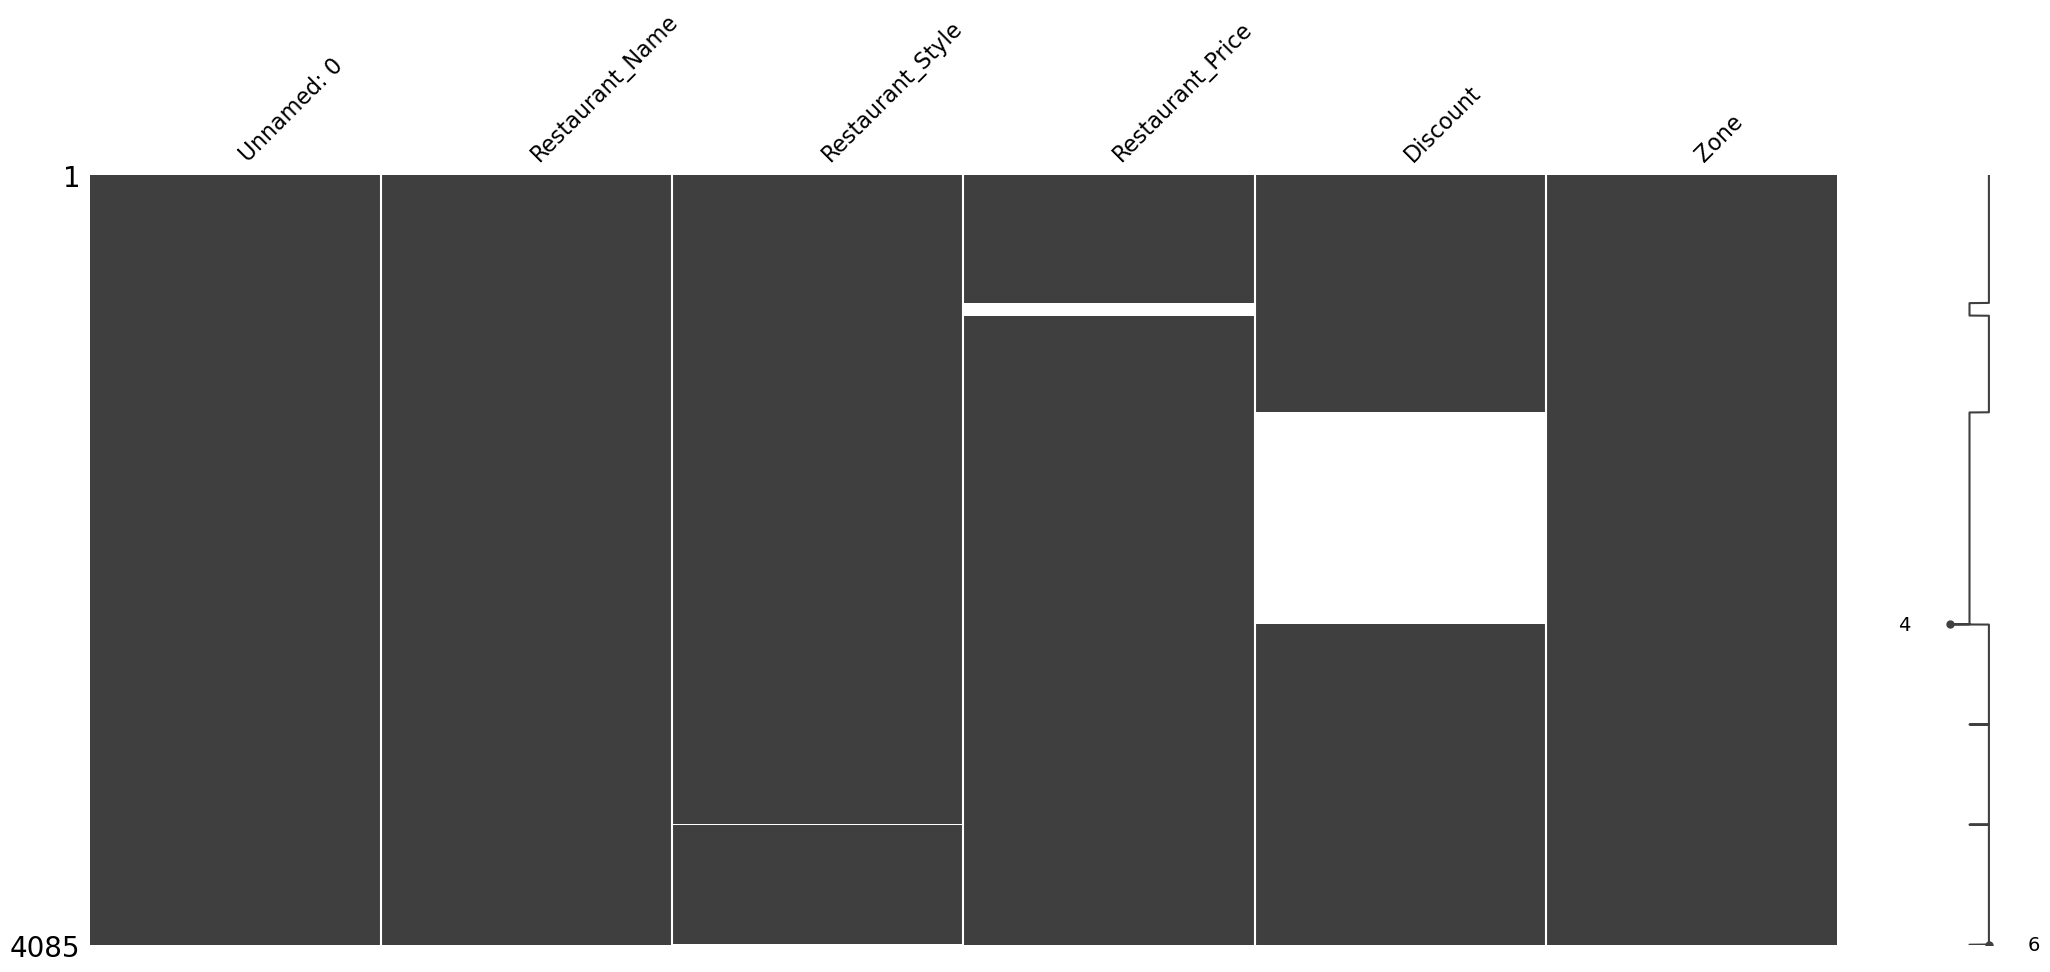

In [137]:
msno.matrix(df)

## Cleaning

In [138]:
duplicates = df.duplicated()
print(duplicates.value_counts())  

False    4085
Name: count, dtype: int64


## Missing Values 

In [139]:
# Dataset Before Filling null values 
df.isnull().sum()/len(df)*100

Unnamed: 0           0.000000
Restaurant_Name      0.000000
Restaurant_Style     0.146879
Restaurant_Price     1.640147
Discount            27.539780
Zone                 0.000000
dtype: float64

In [140]:
df1 = df.fillna('---') 

In [141]:
df1.isnull().sum()/len(df)*100

Unnamed: 0          0.0
Restaurant_Name     0.0
Restaurant_Style    0.0
Restaurant_Price    0.0
Discount            0.0
Zone                0.0
dtype: float64

<Axes: >

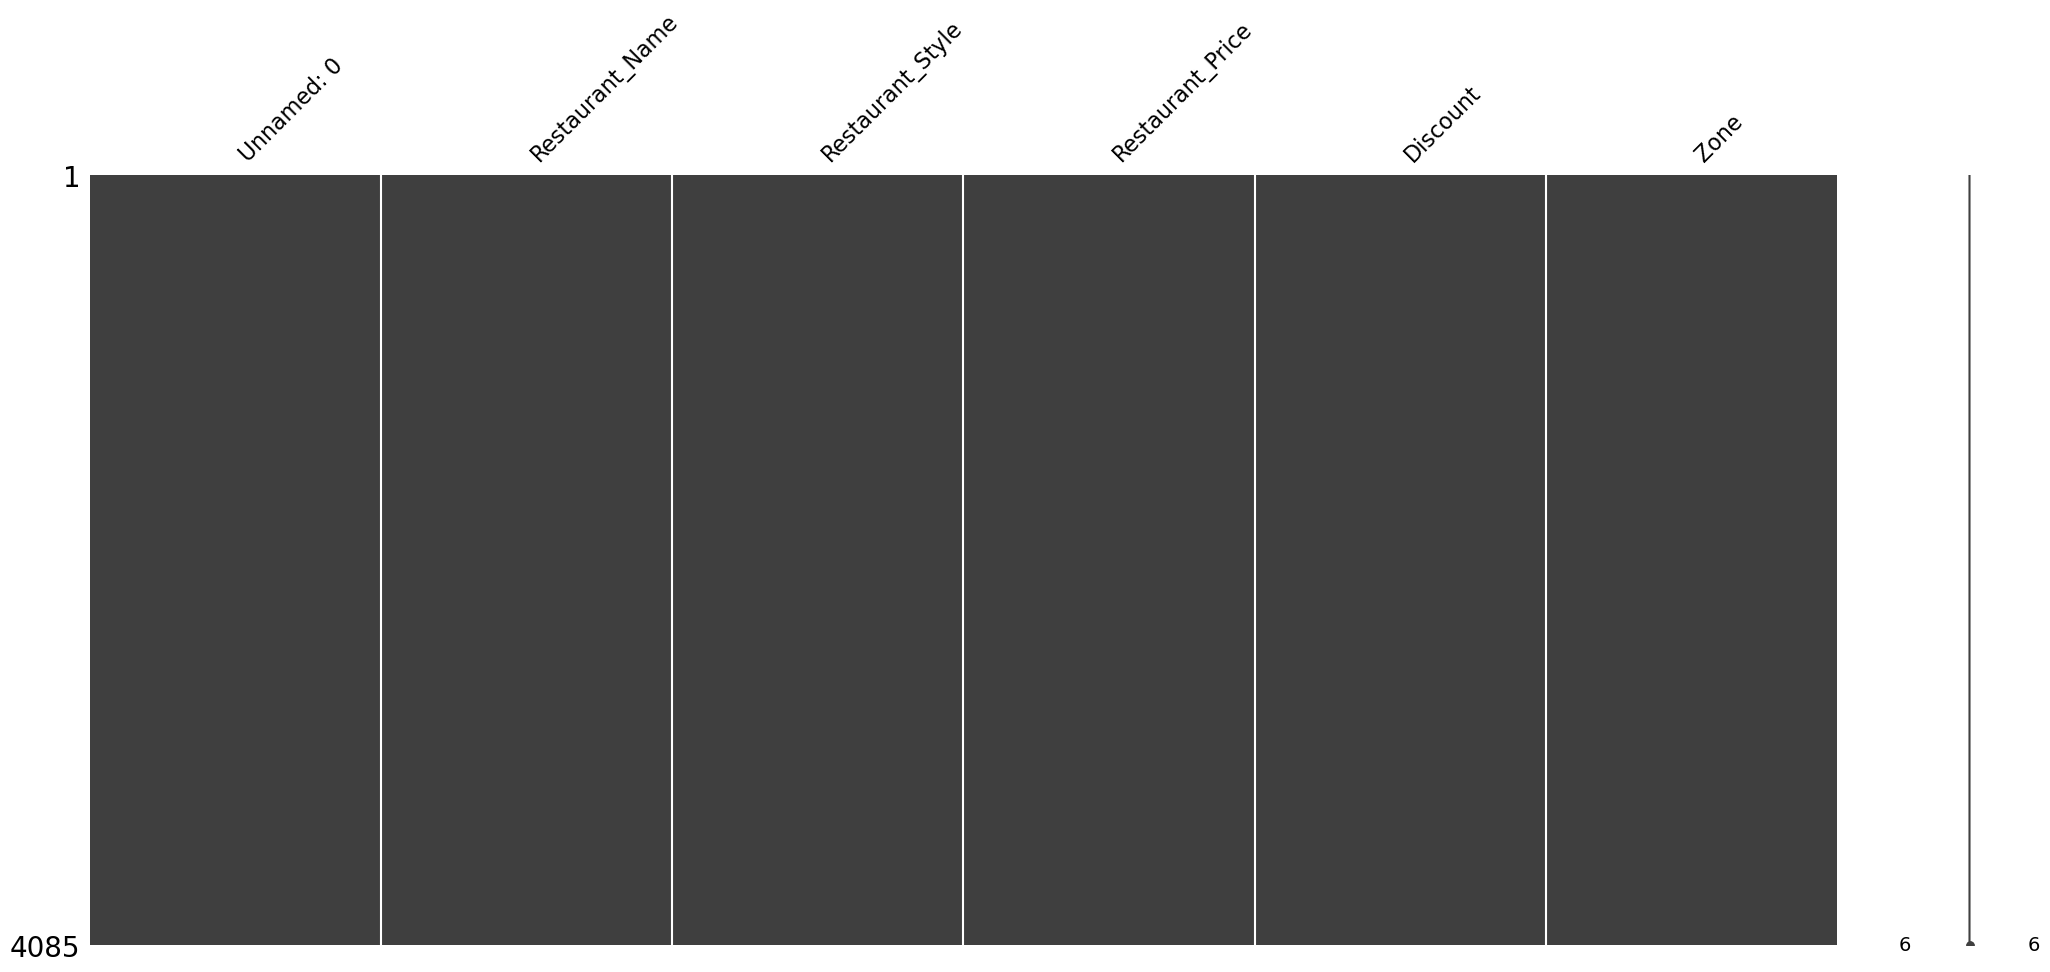

In [142]:
msno.matrix(df1)

In [143]:
df2 = df1.drop(columns=["Unnamed: 0"])

In [144]:
df2

,Restaurant_Name,Restaurant_Style,Restaurant_Price,Discount,Zone
0,Golconda Pavilion,"Multicuisine, Continental, Chinese, Desserts, ...",₹ 2500 for two approx.,25% Off :Payeazy,Hyderabad
1,Ice N Spice,"North Indian, South Indian",₹ 750 for two approx.,20% Off + 25% Off,Hyderabad
2,10 Biryanis,"Mughlai, North Indian",₹ 1200 for two approx.,15% Off + 25% Off,Hyderabad
3,Punjab Grill,North Indian,₹ 1100 for two approx.,20% Off + 25% Off,Hyderabad
4,Punjabi Swag,"North Indian, Chinese",₹ 800 for two approx.,15% Off + 25% Off,Hyderabad
...,...,...,...,...,...
4080,Kanji Hotel & Lounge,Multicuisine,₹ 1600 for two approx.,25% Off :Payeazy,Pune
4081,Mumbasa Cafe,Multicuisine,₹ 800 for two approx.,25% Off :Payeazy,Pune
4082,Terrace Court,---,₹ 1000 for two approx.,25% Off :Payeazy,Pune
4083,Dinero - The Rooftop Fly High,---,₹ 1400 for two approx.,25% Off :Payeazy,Pune


## Data Visualization

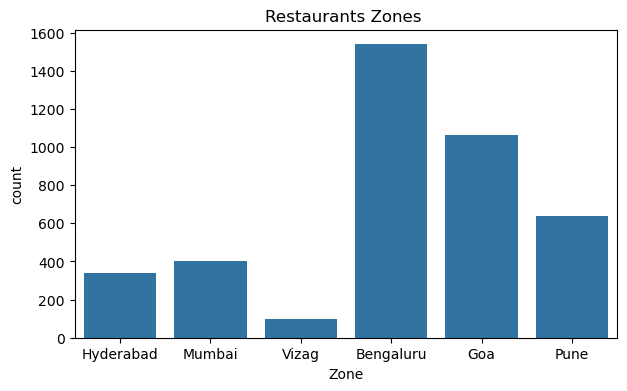

In [146]:
# Bar Chart (Categorical variable)
plt.figure(figsize=(7, 4))
sns.countplot(x='Zone', data=df2)
plt.title('Restaurants Zones ')
plt.show()

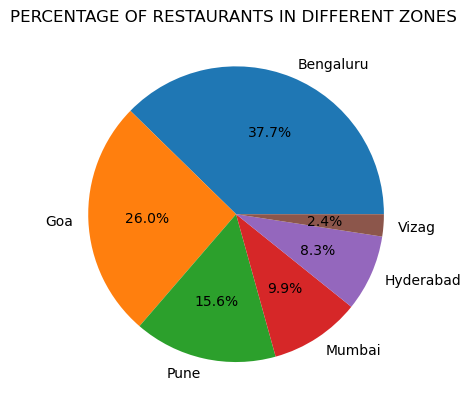

In [147]:
# Pie Chart 
df2['Zone'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.title('PERCENTAGE OF RESTAURANTS IN DIFFERENT ZONES ')
plt.ylabel('')
plt.show()

In [148]:
df2.to_csv("Restaurants Clean Data.csv")